# Exercício 3
## Dados desbalanceados
### Grupo: 
### Alunos:

- David Melo da Luz
- Nilson T Perez

---

No dataset que será utilizado nesse exercício, cada elemento representa uma transação com cartões de crédito. 

A base possui 30 atributos. `Time` representa o tempo em segundos desde a primeira transação da base. `Amount` corresponde ao valor da transação.

Outros 28 atributos numéricos anonimizados também são fornecidos, com 1 variável (`Class`) de saída onde 1 significa fraude e 0 transação normal.

**Esse exerício possui material complementar ("Undersampling e Oversampling")**

### Questão 01.
Carregue o dataset `creditcard_sampled.csv` e mostre a distribuição das classes:

*   Via histograma
*   Exibindo o número de ocorrências de cada classe



In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
df = pd.read_csv(r'E:\usp\creditcard_sampled.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10492 entries, 541 to 87896
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10492 non-null  float64
 1   V1      10492 non-null  float64
 2   V2      10492 non-null  float64
 3   V3      10492 non-null  float64
 4   V4      10492 non-null  float64
 5   V5      10492 non-null  float64
 6   V6      10492 non-null  float64
 7   V7      10492 non-null  float64
 8   V8      10492 non-null  float64
 9   V9      10492 non-null  float64
 10  V10     10492 non-null  float64
 11  V11     10492 non-null  float64
 12  V12     10492 non-null  float64
 13  V13     10492 non-null  float64
 14  V14     10492 non-null  float64
 15  V15     10492 non-null  float64
 16  V16     10492 non-null  float64
 17  V17     10492 non-null  float64
 18  V18     10492 non-null  float64
 19  V19     10492 non-null  float64
 20  V20     10492 non-null  float64
 21  V21     10492 non-null  float64
 

array([[<AxesSubplot:title={'center':'Class'}>]], dtype=object)

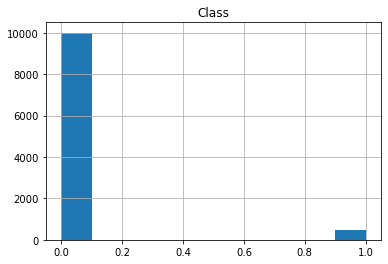

In [43]:
df.hist('Class')

In [44]:
df['Class'].value_counts()

0    10000
1      492
Name: Class, dtype: int64



---

### Questão 02.

Separe o conjunto de dados em variáveis de entrada e variável alvo.

In [45]:
X = df.drop('Class', axis=1)
y = df['Class']




---

### Questão 03.

Crie uma função que aplique a técnica de subamostragem aleatória nesse conjunto de dados. 
- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função e deve retornar um novo conjunto onde todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

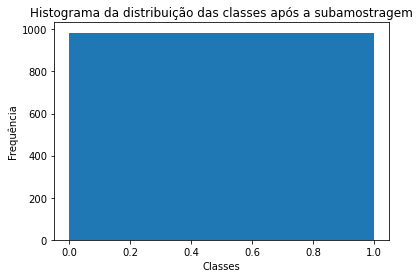

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import shuffle

def undersample(inputs, targets):
    unique_classes, counts = np.unique(targets, return_counts=True)
    min_class_count = np.min(counts)

    undersampled_data = np.empty((0, inputs.shape[1]))
    undersampled_targets = np.array([], dtype=np.int64)

    for cls in unique_classes:
        cls_indices = np.where(targets == cls)[0]
        selected_indices = np.random.choice(cls_indices, min_class_count, replace=False)

        undersampled_data = np.vstack((undersampled_data, inputs[selected_indices]))
        undersampled_targets = np.concatenate((undersampled_targets, targets[selected_indices]))

    undersampled_data, undersampled_targets = shuffle(undersampled_data, undersampled_targets, random_state=42)
    return undersampled_data, undersampled_targets


X_normalized = X  
y_normalized = y
undersampled_data, undersampled_targets = undersample(X_normalized.values, y_normalized.values)

# Plotar o histograma da distribuição das classes resultantes
plt.hist(undersampled_targets, bins=np.unique(undersampled_targets))
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.title("Histograma da distribuição das classes após a subamostragem")
plt.show()



---

### Questão 04.

Crie uma função que aplique a técnica de superamostragem aleatória nesse conjunto de dados. 

- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função deve receber como entrada a base original e retornar um novo conjunto de dados onde todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

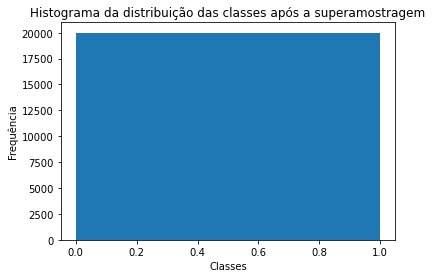

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import shuffle

def oversample(inputs, targets):
    unique_classes, counts = np.unique(targets, return_counts=True)
    max_class_count = np.max(counts)

    oversampled_data = np.empty((0, inputs.shape[1]))
    oversampled_targets = np.array([], dtype=np.int64)

    for cls in unique_classes:
        cls_indices = np.where(targets == cls)[0]
        selected_indices = np.random.choice(cls_indices, max_class_count, replace=True)

        oversampled_data = np.vstack((oversampled_data, inputs[selected_indices]))
        oversampled_targets = np.concatenate((oversampled_targets, targets[selected_indices]))

    oversampled_data, oversampled_targets = shuffle(oversampled_data, oversampled_targets, random_state=42)
    return oversampled_data, oversampled_targets


X_normalized = X  
y_normalized = y
oversampled_data, oversampled_targets = oversample(X_normalized.values, y_normalized.values)

# Plotar o histograma da distribuição das classes resultantes
plt.hist(oversampled_targets, bins=np.unique(oversampled_targets))
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.title("Histograma da distribuição das classes após a superamostragem")
plt.show()


---

### Questão 05.

Crie uma função que utilize técnicas de subamostragem e superamostragem nesse conjunto de dados para balancear o número de exemplos de cada classe.

- Sua função deve receber como entrada a base normalizada e as classes.
- Sua função deve receber como entrada a base original e retornar uma nova base onde todas as classes devem ter o número de ocorrências **igual à $\frac{tamanho\_dataset}{3}$** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

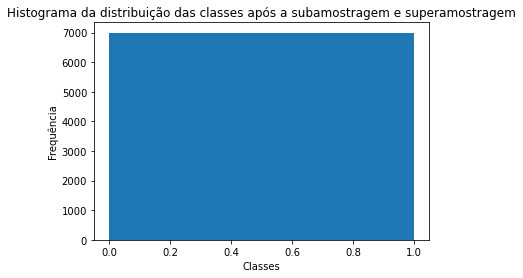

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import shuffle

def dataset_sample(inputs, targets):
    unique_classes, counts = np.unique(targets, return_counts=True)
    target_sample_count = len(targets) // 3

    dataset_sampled_data = np.empty((0, inputs.shape[1]))
    dataset_sampled_targets = np.array([], dtype=np.int64)

    for cls in unique_classes:
        cls_indices = np.where(targets == cls)[0]

        if len(cls_indices) > target_sample_count:
            selected_indices = np.random.choice(cls_indices, target_sample_count, replace=False)
        else:
            selected_indices = np.random.choice(cls_indices, target_sample_count, replace=True)

        dataset_sampled_data = np.vstack((dataset_sampled_data, inputs[selected_indices]))
        dataset_sampled_targets = np.concatenate((dataset_sampled_targets, targets[selected_indices]))

    dataset_sampled_data, dataset_sampled_targets = shuffle(dataset_sampled_data, dataset_sampled_targets, random_state=42)
    return dataset_sampled_data, dataset_sampled_targets


X_normalized = X  
y_normalized = y
dataset_sampled_data, dataset_sampled_targets = dataset_sample(X_normalized.values, y_normalized.values)

# Plotar o histograma da distribuição das classes resultantes
plt.hist(dataset_sampled_targets, bins=np.unique(dataset_sampled_targets))
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.title("Histograma da distribuição das classes após a subamostragem e superamostragem")
plt.show()

### Questão 06.

Implemente o algoritmo SMOTE e aplique-o na base de forma que a classe minoritaria cresça em 300%.

Dicas:

- Considere aumentos a partir de 100% do conjunto (dobrar o número de exemplos)

- O algoritmo SMOTE executa as seguinte etapas (Adaptado do artigo: https://arxiv.org/pdf/1106.1813.pdf):

  - Encontre os k vizinho mais próximo (distância euclidiana do vetor de atributos) de cada elemento da classe minoritaria
  - Para cada elemento E da classe minoritaria:
      - Escolha um dos k vizinhos de E, L aleatoriamente
      - Calcule a diferença D entre os atributos (L-E)
      - Calcule um número aleatório G entre 0 e 1
      - Novo elemento = E + D*G

- Dados dois numpy arrays x e y, a distância euclidiana pode ser calculada com `np.linalg.norm(x-y)`

Pseudo-código no artigo:

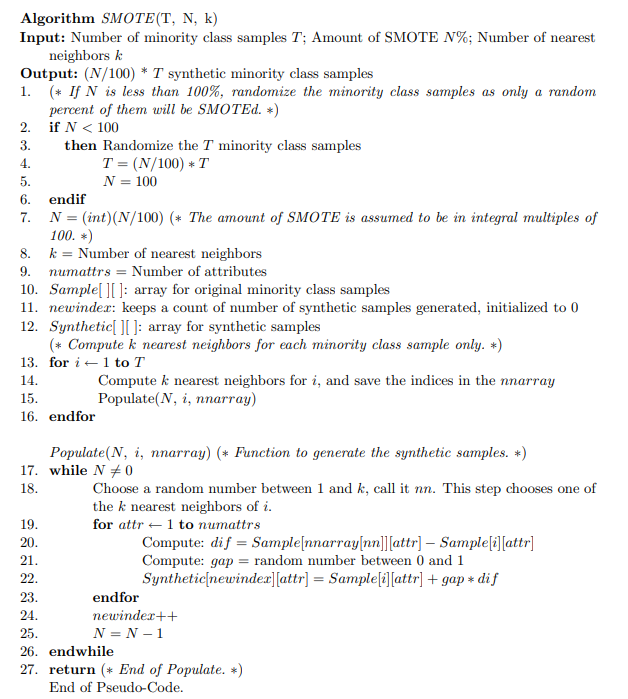

In [49]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors

def nn(elem, data, k):
    nbrs = NearestNeighbors(n_neighbors=k + 1).fit(data)
    distances, indices = nbrs.kneighbors(elem.reshape(1, -1))
    k_proximos = indices[0][1:]
    return k_proximos

def populate(elem, vizinhos, k, num_sinteticos, data):
    novos_elementos = np.empty((0, elem.shape[0]))
    for _ in range(num_sinteticos):
        idx_vizinho = np.random.choice(vizinhos)
        vizinho = data[idx_vizinho]

        D = vizinho - elem
        G = np.random.rand()

        novo_elemento = elem + D * G
        novos_elementos = np.vstack((novos_elementos, novo_elemento))

    return novos_elementos

def smote(df, num_vizinhos=3, pct_novos_ex=300):
    targets = df["Class"]
    unique_classes, counts = np.unique(targets, return_counts=True)
    minority_class = unique_classes[np.argmin(counts)]
    minority_data = df[df["Class"] == minority_class].drop(columns=["Class"]).values

    num_sinteticos = int(minority_data.shape[0] * (pct_novos_ex / 100))

    novos_exemplos = np.empty((0, minority_data.shape[1]))

    for elem in minority_data:
        k_proximos = nn(elem, minority_data, num_vizinhos)
        novos_elementos = populate(elem, k_proximos, num_vizinhos, num_sinteticos // minority_data.shape[0], minority_data)
        novos_exemplos = np.vstack((novos_exemplos, novos_elementos))

    novos_exemplos_df = pd.DataFrame(novos_exemplos, columns=df.columns[:-1])
    novos_exemplos_df["Class"] = minority_class

    new_df = pd.concat([df, novos_exemplos_df])
    new_df = shuffle(new_df, random_state=42)

    return new_df

dat = df.drop(columns=['Time'])
new_data = smote(dat)


Original minority count: 492
New minority count: 1968


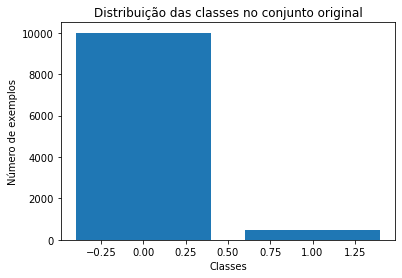

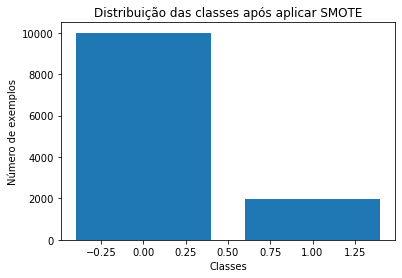

In [50]:
def plot_class_distribution(targets, title):
    unique_classes, counts = np.unique(targets, return_counts=True)
    plt.bar(unique_classes, counts)
    plt.xlabel("Classes")
    plt.ylabel("Número de exemplos")
    plt.title(title)
    plt.show()

original_targets = dat["Class"]
new_targets = new_data["Class"]


original_minority_count = np.min(np.unique(original_targets, return_counts=True)[1])
new_minority_count = np.min(np.unique(new_targets, return_counts=True)[1])
print(f"Original minority count: {original_minority_count}")
print(f"New minority count: {new_minority_count}")


plot_class_distribution(original_targets, "Distribuição das classes no conjunto original")
plot_class_distribution(new_targets, "Distribuição das classes após aplicar SMOTE")